Linear Polymer Melt
===========

In this example, we use *typyPRISM* to study and understand a simple but imoportant system: A dense, linear homopolymer melt. We take advantage of the fact that PRISM theory doesn't have a simulation 'box' and study very long (N=16,000) gaussian polymer chains.

### Concepts
- 1 component PRISM
- Phase space "hopping"
- Gaussian chains

### Tools 
- typyPRISM.calculate.prism.structure_factor
- typyPRISM.calculate.prism.pair_correlation

References
-----------
1. Curro, J.G.; Schweizer K.S.; Integral Equation Theory of Homopolymer
   Melts, Molecular Crystals and Liquid Crystals Incorporating Nonlinear 
   Optics, 180:1, 77-89, doi: 10.1080/00268949008025790
 
  

Global Imports and Setup
----------------------------


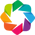

In [1]:
import numpy as np
import holoviews as hv
hv.extension('bokeh')

%load_ext autoreload
%autoreload 2

In [2]:
%opts Curve Scatter [width=500,height=400] Layout [shared_axes=False] Scatter (size=10,alpha=0.5)
%opts Curve Scatter [fontsize={'xlabel':14,'legend':14,'ylabel':14,'ticks':14}]
%opts Overlay [legend_position='bottom_left']
%opts Layout [shared_axes=False]


colors = {}
colors[1.0] = 'blue'
colors[0.8] = 'red'
colors[0.6] = 'green'

ls = {}
ls[1.0] = 'solid'
ls[0.8] = 'dashed'
ls[0.6] = 'dotted'

markers = {}
markers[1.0] = 'o'
markers[0.8] = '^'
markers[0.6] = 'd'

Demo
-----

First we'll load in the data extracted from the literature that we'll be comparing against. 

In [3]:
gr_compare = []
sk_compare = []
for density in [0.6,0.8,1.0]:
    fname = './data/LinearMelt-Gr-rho{}.csv'.format(density)
    x,y = np.loadtxt(fname,delimiter=',').T
    gr_compare.append([density,x,y])
    
    fname = './data/LinearMelt-Sk-rho{}.csv'.format(density)
    x,y = np.loadtxt(fname,delimiter=',').T
    sk_compare.append([density,x,y])


Next, we'll use typyPRISM to calculate data for a linear polymer melt of of gaussian chains of length 16000, as described in Reference 1. 

In [4]:
import typyPRISM
from typyPRISM.calculate.prism.structure_factor import structure_factor
from typyPRISM.calculate.prism.pair_correlation import pair_correlation
import numpy as np

sys = typyPRISM.System(['polymer'],kT=1.0)
sys.domain = typyPRISM.Domain(dr=0.005,length=32768)
sys.closure['polymer','polymer'] = typyPRISM.closure.PercusYevick()
sys.potential['polymer','polymer'] = typyPRISM.potential.HardSphere(sigma=1.0)
sys.omega['polymer','polymer'] = typyPRISM.omega.Gaussian(sigma=1.0,length=16000)


gr_results = []
sk_results = []
guess = np.zeros_like(sys.domain.r)
for density in [0.6,0.8,1.0]:
    print('==> Solving for density {}'.format(density))
    sys.density['polymer'] = density
    PRISM = sys.createPRISM()
    result = PRISM.solve(guess)
    guess = np.copy(PRISM.x)
    
    y = structure_factor(PRISM)['polymer','polymer']
    x = sys.domain.k
    sk_results.append([density,x,y])
    
    x = sys.domain.r
    y = pair_correlation(PRISM)['polymer','polymer']
    gr_results.append([density,x,y])
    
    


==> Solving for density 0.6
0:  |F(x)| = 81.9231; step 0.186349; tol 0.593894
1:  |F(x)| = 81.8849; step 0.000490242; tol 0.89916
2:  |F(x)| = 81.6487; step 0.00302978; tol 0.894817
3:  |F(x)| = 81.5051; step 0.00185416; tol 0.896837
4:  |F(x)| = 67.3323; step 0.15266; tol 0.723885
5:  |F(x)| = 66.924; step 0.0349993; tol 0.889119
6:  |F(x)| = 66.3525; step 0.0383787; tol 0.884693
7:  |F(x)| = 66.3017; step 0.0108826; tol 0.898623
8:  |F(x)| = 65.9845; step 0.027576; tol 0.891409
9:  |F(x)| = 65.9811; step 0.000723179; tol 0.899908
10:  |F(x)| = 65.9803; step 0.000168485; tol 0.899979
11:  |F(x)| = 65.9799; step 9.45296e-05; tol 0.899988
12:  |F(x)| = 65.7162; step 0.029531; tol 0.89282
13:  |F(x)| = 65.7133; step 0.000599012; tol 0.899922
14:  |F(x)| = 65.6897; step 0.00462221; tol 0.899353
15:  |F(x)| = 65.568; step 0.0208613; tol 0.896668
16:  |F(x)| = 65.4853; step 0.0157736; tol 0.89773
17:  |F(x)| = 65.4395; step 0.00880559; tol 0.898741
18:  |F(x)| = 65.3126; step 0.0240576; tol

We start by reproducing Figure 1 of Reference 1.

In [5]:
%%opts Overlay [legend_position='bottom_right']
from math import sqrt

extents = (0,0,0.6,1.0)

gr_plots = []
for rho,x,y in gr_results:
    Rg = sqrt(16000/6.0)
    label = 'rho={} (typyPRISM)'.format(rho)
    style = {'line_dash':ls[rho],'color':colors[rho]}
    c1 = hv.Curve((x/Rg,y),label=label,extents=extents)(style=style)
    gr_plots.append(c1)
    
for rho,x,y in gr_compare:
    label = 'rho={} (Ref 1)'.format(rho)
    style = {'marker':markers[rho],'color':colors[rho]}
    c1 = hv.Scatter((x,y),label=label,extents=extents)(style=style)
    gr_plots.append(c1)
    
    
hv.Overlay(gr_plots).redim.label(x='r',y='g(r)')

:Overlay
   .Curve.Rho_equals_0_full_stop_6_left_parenthesis_typyPRISM_right_parenthesis :Curve   [x]   (y)
   .Curve.Rho_equals_0_full_stop_8_left_parenthesis_typyPRISM_right_parenthesis :Curve   [x]   (y)
   .Curve.Rho_equals_1_full_stop_0_left_parenthesis_typyPRISM_right_parenthesis :Curve   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_6_left_parenthesis_Ref_1_right_parenthesis   :Scatter   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_8_left_parenthesis_Ref_1_right_parenthesis   :Scatter   [x]   (y)
   .Scatter.Rho_equals_1_full_stop_0_left_parenthesis_Ref_1_right_parenthesis   :Scatter   [x]   (y)

Next, we reproduce Figure 3:

In [6]:
sk_plots = []
for rho,x,y in sk_results:
    yd = y - 1.0
    label = 'rho={} (typyPRISM)'.format(rho)
    style = {'line_dash':ls[rho],'color':colors[rho]}
    c1 = hv.Curve((x,yd/yd[0]),label=label,extents=(0,0,3,None))(style=style)
    sk_plots.append(c1)
    
for rho,x,y in sk_compare:
    style = {'marker':markers[rho],'color':colors[rho]}
    c1 = hv.Scatter((x,y),label='rho={} (Ref 1)'.format(rho),extents=(0.0,0,3,None))(style=style)
    # c1 = hv.Scatter((x,y),extents=(0.0,0,3,None))(style=style)
    sk_plots.append(c1)
    
    
hv.Overlay(sk_plots).redim.label(x='k',y='S(k)')

:Overlay
   .Curve.Rho_equals_0_full_stop_6_left_parenthesis_typyPRISM_right_parenthesis :Curve   [x]   (y)
   .Curve.Rho_equals_0_full_stop_8_left_parenthesis_typyPRISM_right_parenthesis :Curve   [x]   (y)
   .Curve.Rho_equals_1_full_stop_0_left_parenthesis_typyPRISM_right_parenthesis :Curve   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_6_left_parenthesis_Ref_1_right_parenthesis   :Scatter   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_8_left_parenthesis_Ref_1_right_parenthesis   :Scatter   [x]   (y)
   .Scatter.Rho_equals_1_full_stop_0_left_parenthesis_Ref_1_right_parenthesis   :Scatter   [x]   (y)

Finally, we reproduce the inset of Figure 3:

In [7]:
sk0_plots = []
for rho,x,y in sk_results:
    yd = y - 1
    label = 'rho={} (typyPRISM)'.format(rho)
    style = {'line_dash':ls[rho],'color':colors[rho]}
    c1 = hv.Scatter((rho,yd[0]),label=label,extents=(0.4,0,1.2,11))(style=style)
    sk0_plots.append(c1)
    
hv.Overlay(sk0_plots).redim.label(x='rho',y='S(0)')

:Overlay
   .Scatter.Rho_equals_0_full_stop_6_left_parenthesis_typyPRISM_right_parenthesis :Scatter   [x]   (y)
   .Scatter.Rho_equals_0_full_stop_8_left_parenthesis_typyPRISM_right_parenthesis :Scatter   [x]   (y)
   .Scatter.Rho_equals_1_full_stop_0_left_parenthesis_typyPRISM_right_parenthesis :Scatter   [x]   (y)

In [8]:
# fig3a = {}
# for (rho1,x1,y1),(rho2,x2,y2) in zip(sk_results,sk_compare):
#     y1 = y1 - 1.0
#     y1/=y1[0]
# 
#     fig3a[rho1,'typyPRISM'] = {'x':x1,'y':y1}
#     fig3a[rho2,'ref'] = {'x':x2,'y':y2}
# 
# import pickle
# with open('fig3a.pkl','wb') as f:
#     pickle.dump(fig3a,f)